# Stylometry

Measurement of style. 

Most frequent words: the, an, a, he, she
 - "stop words" 
 - style words, are usually 100-800
 
Lesser frequent words: 
 - content words
 
## Assembling a Corpus using Corpus-DB

http://corpus-db.org

- API: application programming interface
  - A website for computers to use

In [74]:
import requests
import json
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import pandas as pd
from sklearn.decomposition import PCA
from nltk.corpus import gutenberg

In [3]:
# Get metadata for The Moonstone
response = requests.get('http://corpus-db.org/api/id/155.0')gutenberg

In [5]:
response.ok

True

In [10]:
moonstoneData = json.loads(response.text) # JSON data

In [11]:
moonstoneData.keys()

dict_keys(['lcsh', 'summary', 'series_note', 'creator', 'production_note', 'downloads', 'rights_url', 'wp_publication_date', 'authoryearofdeath', '_repo', 'wp_subjects', 'language_note', 'tableOfContents', 'gutenberg_issued', 'identifiers', 'formats', 'gutenberg_type', '', 'publication_note', 'url', 'edition_identifiers', 'rights', 'authoryearofbirth', 'wp_info', 'languages', 'LCC', 'publication_date', 'subjects', 'wikipedia', 'author', 'id', 'gutenberg_bookshelf', '_version', 'releaseDate', 'alternative_title', 'title', 'type', 'wp_literary_genres', 'contributor', 'edition_note', 'titlepage_image', 'jmdate', 'publisher', 'covers', 'description', 'filename'])

In [12]:
moonstoneData['author']

'Collins, Wilkie'

In [13]:
moonstoneData['title']

'The Moonstone'

In [14]:
response = requests.get('http://corpus-db.org/api/author/Collins, Wilkie')

In [16]:
parsedResponse = json.loads(response.text)

In [17]:
[item['title'] for item in parsedResponse]

['The Moonstone',
 'The Haunted Hotel: A Mystery of Modern Venice',
 'The Woman in White',
 'No Name',
 'Man and Wife',
 'The Black Robe',
 "A Rogue's Life",
 'Miss or Mrs.?',
 'The Law and the Lady',
 'The New Magdalen',
 'The Two Destinies',
 'The Frozen Deep',
 'After Dark',
 'The Evil Genius: A Domestic Story',
 "My Lady's Money",
 '"I Say No"',
 'Little Novels',
 'Armadale',
 'The Queen of Hearts',
 'The Legacy of Cain',
 'A Fair Penitent',
 'Antonina; Or, The Fall of Rome',
 'Poor Miss Finch',
 "Jezebel's Daughter",
 'The Guilty River',
 'Basil',
 'Blind Love',
 'The Dead Alive',
 'Heart and Science: A Story of the Present Time',
 'Hide and Seek',
 'The Fallen Leaves',
 "L'hôtel hanté",
 'John Jagon henki tahi kuollutko vai elävä?',
 'Ilman menestyksettä: Joulukertomus',
 'Sisar Rosa',
 'Rambles Beyond Railways; or, Notes in Cornwall taken A-foot',
 'Kamala yösija',
 'The Dead Secret: A Novel',
 'My Miscellanies, Vol. 1 (of 2)',
 'My Miscellanies, Vol. 2 (of 2)',
 'Valkopukuinen 

In [18]:
collinsCorpusMeta = parsedResponse[:10]

In [20]:
collinsCorpusIds = [book['id'] for book in collinsCorpusMeta]

In [30]:
def getFullText(bookId): 
    url = f'http://corpus-db.org/api/id/{bookId}/fulltext'
    response = requests.get(url)
    if response.ok: 
        bookText = json.loads(response.text)
        return bookText[0]['text']
    else:
        print('ERROR: response not ok! Abandon ship!')

In [35]:
collinsTexts = []
for bookId in collinsCorpusIds:
    collinsTexts.append(getFullText(bookId))

In [36]:
len(collinsTexts)

10

In [37]:
collinsTitles = [book['title'] for book in collinsCorpusMeta]

In [38]:
len(collinsTitles)

10

To get proportions of words in a text, not just their counts, use `TfidfVectorizer()`. 

## Tf-IDF

Term frequency adjusted for inverse document frequency
 - term frequency: how often does it occur in the single text? 
 - document frequency: how many texts does it occur in, in the corpus? 



In [41]:
tfidfVectorizer = TfidfVectorizer(min_df=1.0, max_features=400, use_idf=False)

In [43]:
collinsFreq = tfidfVectorizer.fit_transform(collinsTexts).todense()

In [49]:
collinsWordNames = tfidfVectorizer.get_feature_names()

In [50]:
len(collinsWordNames)

400

In [54]:
collinsDf = pd.DataFrame(collinsFreq, columns=collinsWordNames, index=collinsTitles)

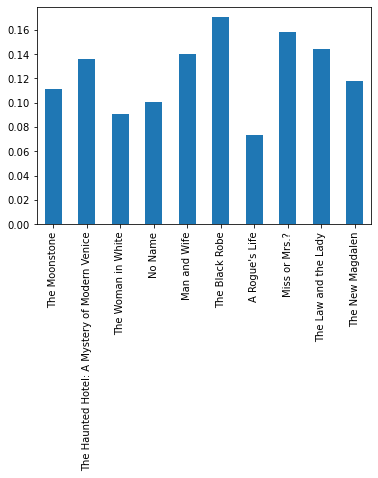

In [58]:
pd.Series(collinsDf['he']).plot(kind='bar')

In [59]:
collinsDf

,about,after,again,against,all,alone,already,always,am,among,...,write,writing,written,years,yes,yet,you,young,your,yourself
The Moonstone,0.018227,0.018437,0.020689,0.003876,0.035878,0.003771,0.004138,0.002671,0.020217,0.004557,...,0.002043,0.002671,0.003143,0.002776,0.005185,0.004819,0.131203,0.006652,0.037083,0.003771
The Haunted Hotel: A Mystery of Modern Venice,0.010662,0.012053,0.019161,0.001700,0.021479,0.004327,0.006954,0.001854,0.019934,0.002472,...,0.001854,0.006336,0.002936,0.002936,0.003863,0.004481,0.121613,0.002163,0.031369,0.004636
The Woman in White,0.018138,0.014653,0.019901,0.005374,0.042700,0.004325,0.003989,0.004493,0.018474,0.003065,...,0.004073,0.003527,0.002855,0.003359,0.009153,0.006424,0.099759,0.003737,0.029390,0.003359
No Name,0.009537,0.016421,0.021228,0.004538,0.035765,0.003923,0.005307,0.003846,0.023267,0.002654,...,0.003653,0.002961,0.004153,0.003615,0.006461,0.005961,0.135447,0.006115,0.051456,0.005230
Man and Wife,0.014886,0.014306,0.020858,0.004100,0.031688,0.004323,0.003343,0.002006,0.020680,0.004591,...,0.004145,0.002986,0.003164,0.003476,0.008156,0.004769,0.137136,0.006730,0.035699,0.004546
The Black Robe,0.010701,0.013023,0.018171,0.003331,0.020392,0.004543,0.006158,0.002726,0.034525,0.004947,...,0.003634,0.002524,0.004038,0.003937,0.007369,0.006966,0.178479,0.005148,0.046033,0.005552
A Rogue's Life,0.018299,0.017022,0.015958,0.004681,0.036597,0.002553,0.002766,0.004043,0.013405,0.004255,...,0.002979,0.003404,0.001064,0.003830,0.002553,0.004043,0.074897,0.007660,0.021490,0.002553
Miss or Mrs.?,0.010559,0.012159,0.016319,0.002880,0.028798,0.002560,0.004800,0.002560,0.011839,0.003520,...,0.000960,0.000320,0.000640,0.003520,0.006400,0.004160,0.110073,0.008639,0.039358,0.002560
The Law and the Lady,0.013154,0.012411,0.021998,0.004088,0.029059,0.003939,0.004088,0.002973,0.024748,0.002898,...,0.003493,0.003047,0.004236,0.002304,0.006837,0.006391,0.150125,0.003493,0.044591,0.004905
The New Magdalen,0.008532,0.010461,0.021329,0.003149,0.023157,0.006196,0.004774,0.001828,0.027728,0.005485,...,0.002539,0.002133,0.002031,0.003149,0.007313,0.006500,0.169006,0.004977,0.046822,0.005383


# PCA: Principal Component Analysis

Collapses our 400 dimensions (most frequent words) to two dimensions, and tries to retain that information. 


In [62]:
pca = PCA(n_components=2)

In [64]:
collinsReduced = pca.fit_transform(collinsFreq)

In [65]:
collinsReduced.shape

(10, 2)

In [66]:
collinsReduced

array([[-0.07070765, -0.02337711],
       [ 0.08568702,  0.04613868],
       [-0.05371399, -0.04433139],
       [ 0.06931412,  0.01893551],
       [ 0.03626063,  0.043455  ],
       [-0.01388628, -0.04260178],
       [-0.15206993, -0.01313662],
       [ 0.00366176,  0.16307373],
       [-0.07323117, -0.04517888],
       [ 0.1686855 , -0.10297714]])

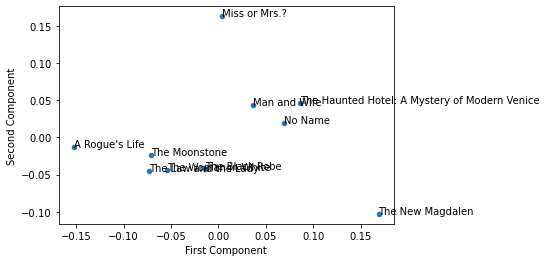

In [73]:
df = pd.DataFrame(collinsReduced, 
             columns=['First Component', 'Second Component'],
             index=collinsTitles
            )
ax = df.plot(kind='scatter', x='First Component', y='Second Component')
for title, points in df.iterrows():
    ax.annotate(title, points)

In [75]:
gutenbergTexts = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()] 

In [86]:
tfidfVectorizer = TfidfVectorizer(max_features=400, use_idf=False)
gutenbergFreqs = tfidfVectorizer.fit_transform(gutenbergTexts)

In [87]:
gutenbergFreqs = gutenbergFreqs.todense()

In [88]:
gutenbergFreqs.shape

(18, 400)

In [91]:
gutDf = pd.DataFrame(gutenbergFreqs, index=gutenberg.fileids(), 
             columns=tfidfVectorizer.get_feature_names())

In [92]:
gutPoints = pca.fit_transform(gutenbergFreqs)

In [94]:
gutPointsDf = pd.DataFrame(gutPoints, index=gutenberg.fileids(), 
                           columns=['First Component', 'Second Component'])

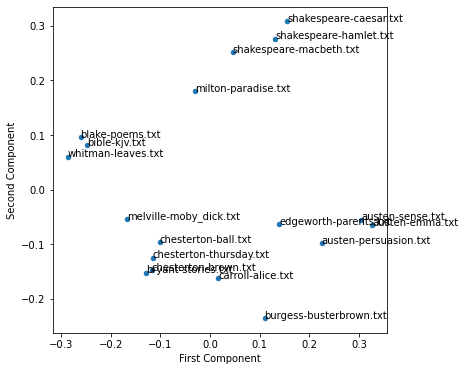

In [99]:
ax = gutPointsDf.plot(kind='scatter', x='First Component', y='Second Component', figsize=(6,6))
for title, points in gutPointsDf.iterrows():
    ax.annotate(title, points)